
1. Which country produces the highest rate chocolate bar?

2. What locations produce the top quality cocao beans?

3. Is the relationship between Cocao Percentage and the customer rating?

## Sweet Tooth EDA

In [3]:
import pandas as pd
data = pd.read_csv('/Users/jeesoojhun/Documents/Flatiron/Assessments/Phase 3/Rapid EDA/Sweet Tooth/flavors_of_cacao.csv')
data.head()



,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


In [1]:
# Another way to read in the data
# SWEET_PATH = "flavors_of_cacao.csv"

# chocolate_ratings = pd.read_csv(SWEET_PATH)

In [3]:
# Clean up newline characters in column names and simplify column names
# def name_cleaner(old_name):
#    new_name = old_name.replace("\n", " ")
#    return new_name

# try:
#    chocolate_ratings.rename(name_cleaner, axis=1, inplace=True)
#except:
#    print("Columns already renamed.")

In [8]:
data.shape


(1795, 9)

In [22]:
data.isnull().sum()

Company  (Maker-if known)           0
Specific Bean Origin or Bar Name    0
REF                                 0
Review Date                         0
Cocoa Percent                       0
Company Location                    0
Rating                              0
Bean Type                           1
Broad Bean Origin                   1
dtype: int64

In [23]:
data = data.dropna()

In [4]:
# use try and except to drop null values
#try:
#    chocolate_ratings.dropna(inplace=True)
#except:
#    print("Null values have already been dropped from this dataset.")

In [24]:
data.isnull().sum()

Company  (Maker-if known)           0
Specific Bean Origin or Bar Name    0
REF                                 0
Review Date                         0
Cocoa Percent                       0
Company Location                    0
Rating                              0
Bean Type                           0
Broad Bean Origin                   0
dtype: int64

In [5]:
# Now let's take a closer look into the distributions and unique values present in each feature to figure out what sanitization and analytical questions to prioritize.
#def uniques_viewer(dataset, feature):
#    table_of_uniques = dataset[feature].value_counts().to_dict()
#   chart_of_uniques = dataset[feature].value_counts().plot(kind="bar")
#    return table_of_uniques, chart_of_uniques

In [6]:
# Data Sanitization on Badly Encoded Features
#Features needed to be sanitized due to bad encoding:
#- **`cocoa_percent`**: Contains `%` symbols.
#- **`bean_type`**: Contains empty strings.
#- **`company_location`**: Contains several misspellings.
#def remove_percent_symbols(row):
#    return float(row.strip("%")) / 100.

#chocolate_ratings["cocoa_concentration"] = chocolate_ratings["cocoa_percent"].map(remove_percent_symbols)

### Part 1: Top 10 Countries In The Chocolate Industry

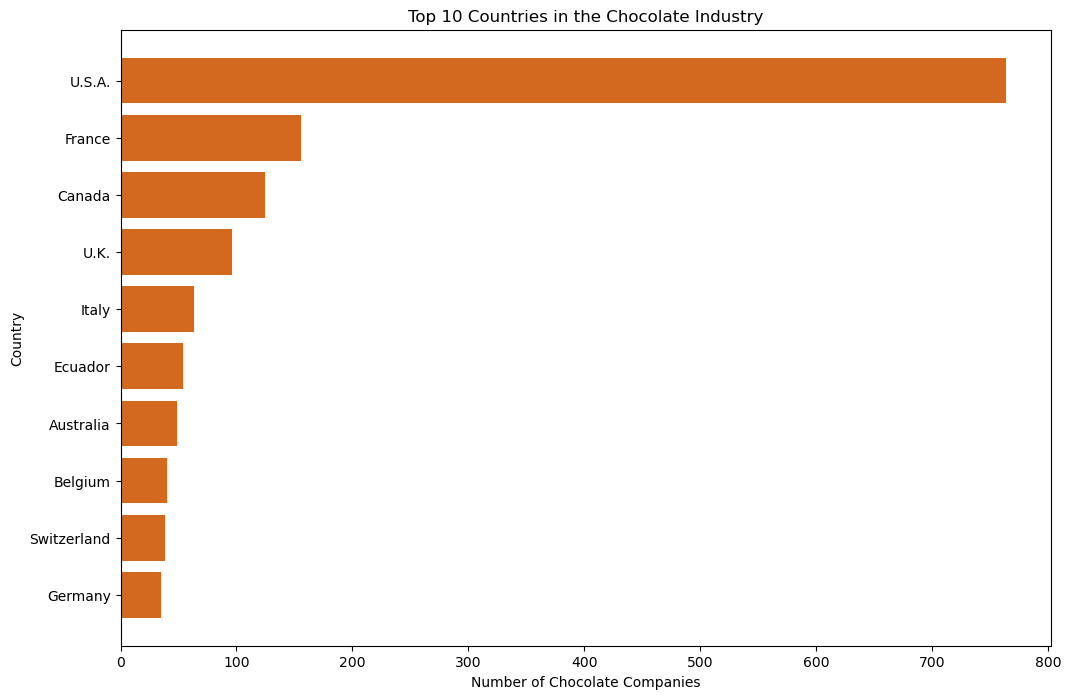

In [25]:
# Plotting a bar chart of the top countries by number of chocolate companies

# Selecting top 10 countries for simplicity
top_countries = company_counts.head(10)

# Plotting
plt.figure(figsize=(12, 8))
plt.barh(top_countries['Country'], top_countries['Count'], color='chocolate')
plt.xlabel('Number of Chocolate Companies')
plt.ylabel('Country')
plt.title('Top 10 Countries in the Chocolate Industry')
plt.gca().invert_yaxis()
plt.show()


### Part 2: Country with the Highest Rate of Chocolate Bars

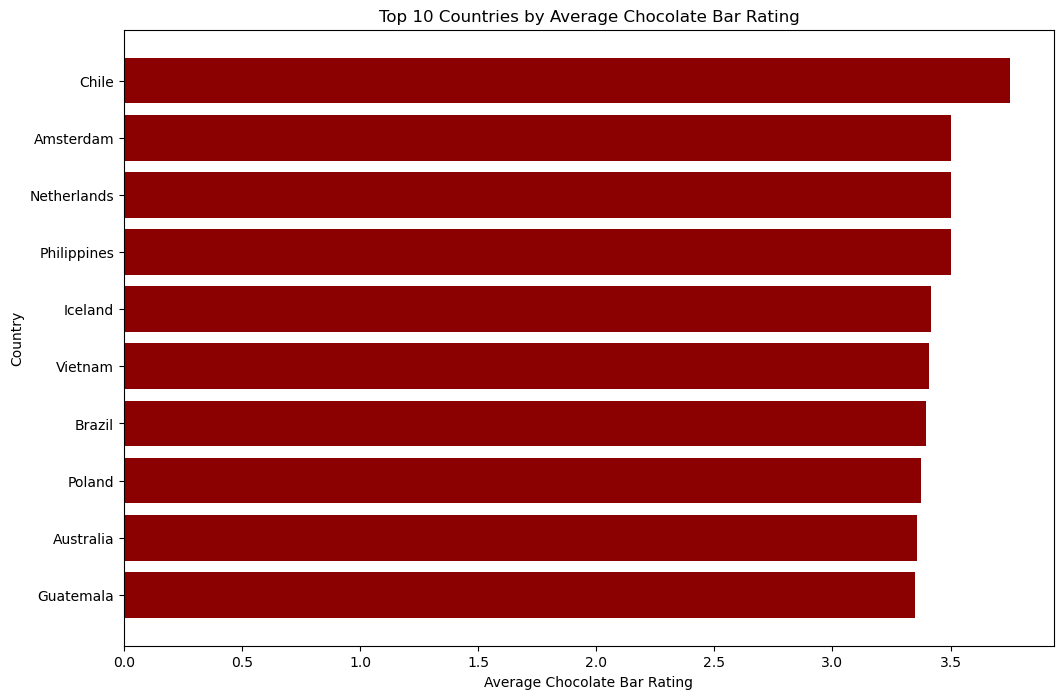

In [26]:
# Calculate the average rating by country
country_ratings = data.groupby('Company Location')['Rating'].mean().reset_index()
country_ratings = country_ratings.sort_values(by='Rating', ascending=False).head(10)

# Plotting the top countries by average rating
plt.figure(figsize=(12, 8))
plt.barh(country_ratings['Company Location'], country_ratings['Rating'], color='darkred')
plt.xlabel('Average Chocolate Bar Rating')
plt.ylabel('Country')
plt.title('Top 10 Countries by Average Chocolate Bar Rating')
plt.gca().invert_yaxis()
plt.show()


The graphs showed that Chile has an average score of 3.75, out ran all the other countries, produces the highest rating chocolate bars. 

If we take the production volume into consideration, Canada and France produce fine quality chocolate with high volumes. Of course, U.S.A produces a large quantity of chocolate with decent favor.

### Part 3: Cocoa Solid Percentage and Rating

/var/folders/tc/1ms7n2d57vv5dn_343mwj34r0000gn/T/ipykernel_32740/2226359682.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Cocoa Percent'] = data['Cocoa Percent'].astype(str).str.replace('%', '').astype(float)


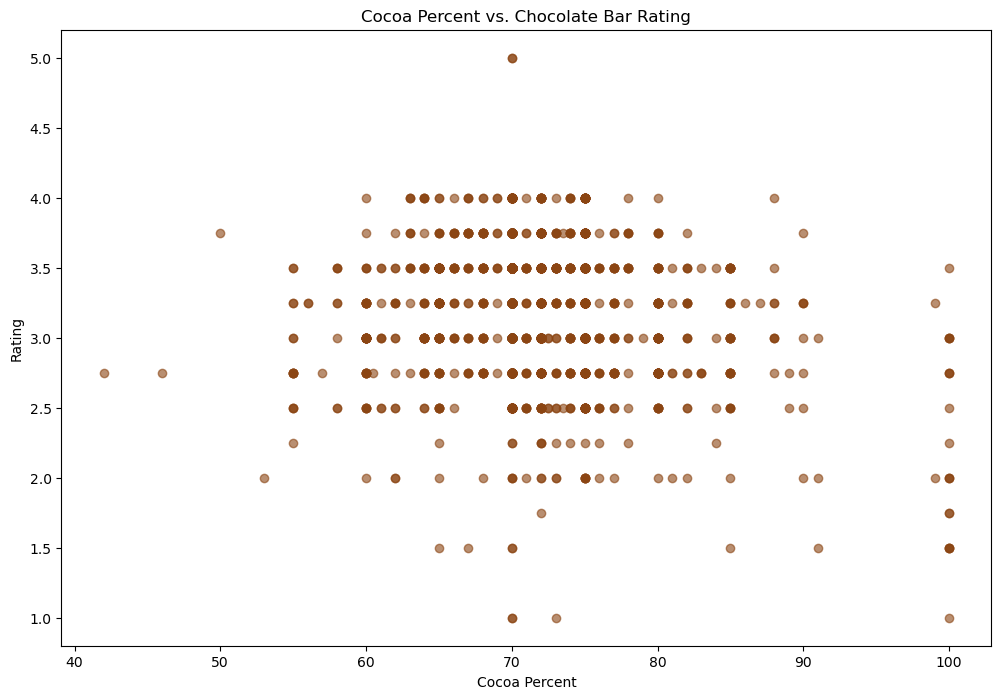

In [51]:
import matplotlib.pyplot as plt

# Convert Cocoa Percent to numeric
data['Cocoa Percent'] = data['Cocoa Percent'].astype(str).str.replace('%', '').astype(float)

# Scatter plot of Cocoa Percent vs. Rating
plt.figure(figsize=(12, 8))
plt.scatter(data['Cocoa Percent'], data['Rating'], alpha=0.6, color='saddlebrown')
plt.xlabel('Cocoa Percent')
plt.ylabel('Rating')
plt.title('Cocoa Percent vs. Chocolate Bar Rating')
plt.show()


Both the highest and lowest rating chocolate bars all contain 70% cocao powder.

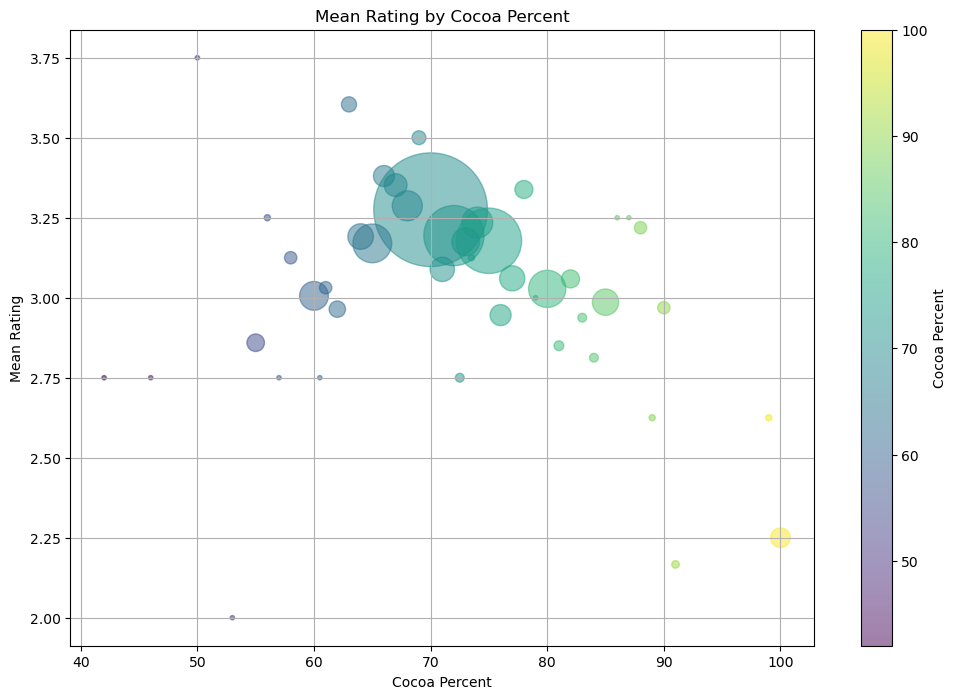

In [61]:
#rating by pct
# Group by Cocoa Percent and calculate count and mean rating
pctdata = data.groupby('Cocoa Percent').agg(count=('Rating', 'size'), rate2=('Rating', 'mean')).reset_index()

# Sort by mean rating
gdpct1 = pctdata.sort_values(by='rate2', ascending=False)

# Plotting
plt.figure(figsize=(12, 8))
plt.scatter(gdpct1['Cocoa Percent'], gdpct1['rate2'], s=gdpct1['count']*10, c=gdpct1['Cocoa Percent'], alpha=0.5, cmap='viridis')
plt.colorbar(label='Cocoa Percent')
plt.xlabel('Cocoa Percent')
plt.ylabel('Mean Rating')
plt.title('Mean Rating by Cocoa Percent')
plt.grid(True)
plt.show()

In [29]:
# Calculate the correlation between Cocoa Percent and Rating
correlation = data[['Cocoa Percent', 'Rating']].corr().iloc[0, 1]
correlation


-0.1647583175456274

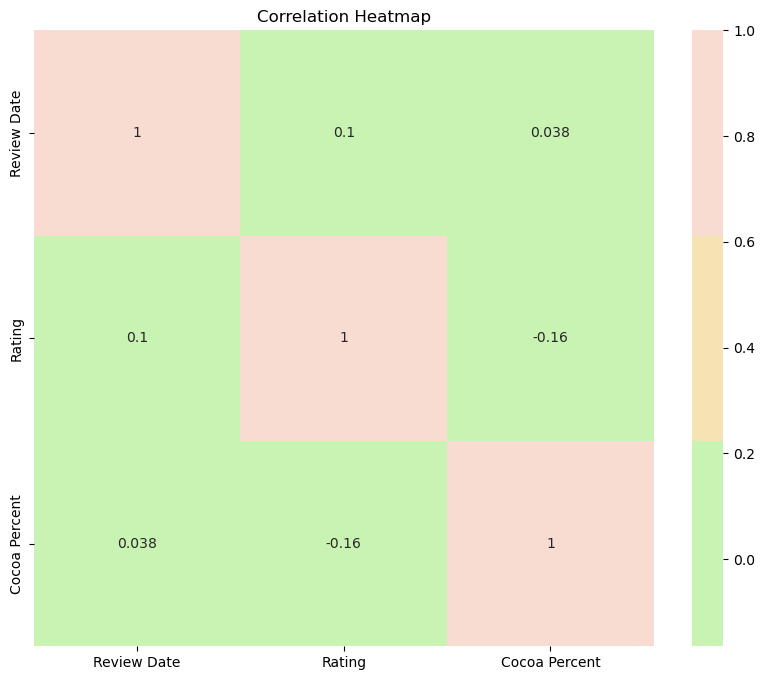

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = data[['Review Date', 'Rating', 'Cocoa Percent']].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap=sns.color_palette(["#C8F3B3", "#F5E3B3", "#F9DCD1"]), cbar=True)
plt.title('Correlation Heatmap')
plt.show()

This suggests that, overall, higher cocoa content does not strongly correlate with higher ratings.

#### Modeling

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Preparing data for modeling
X = data[['Cocoa Percent']]
y = data['Rating']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)

# Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2


(0.2107825399580233, 0.0037162147569735904)

- The linear regression model results show:
 - Mean Squared Error (MSE): 0.2108
 - R-squared (R²): 0.0037

- The low R² value indicates that cocoa percentage explains only a tiny fraction of the variance in ratings, suggesting that other factors likely play a more significant role in determining the chocolate ratings.

In [55]:
# SVM Predicted Rating value vs Cocoa Percentage
from sklearn.svm import SVR

# Create an SVR model
svr_model = SVR(kernel='linear')

# Fit the model
svr_model.fit(X_train, y_train)

# Make predictions
y_svr_pred = svr_model.predict(X_test)

# Evaluate the model
svr_mse = mean_squared_error(y_test, y_svr_pred)
svr_r2 = r2_score(y_test, y_svr_pred)

svr_mse, svr_r2

(0.21047651893610014, 0.005162652313643323)

In [56]:
# Interpret the results
print(f"Mean Squared Error (MSE) of the SVM model: {svr_mse}")
print(f"R-squared (R²) of the SVM model: {svr_r2}")

# Interpretation
if svr_r2 > 0.5:
    print("The SVM model explains a significant portion of the variance in the ratings.")
else:
    print("The SVM model does not explain a significant portion of the variance in the ratings.")

Mean Squared Error (MSE) of the SVM model: 0.21047651893610014
R-squared (R²) of the SVM model: 0.005162652313643323
The SVM model does not explain a significant portion of the variance in the ratings.


In [57]:
from sklearn.ensemble import RandomForestRegressor

# Given the data and the previous models (Linear Regression and SVR), we could also try a Random Forest Regressor to capture non-linear relationships.


# Create a Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
rf_model.fit(X_train, y_train)

# Make predictions
y_rf_pred = rf_model.predict(X_test)

# Evaluate the model
rf_mse = mean_squared_error(y_test, y_rf_pred)
rf_r2 = r2_score(y_test, y_rf_pred)

rf_mse, rf_r2

(0.20514306343926475, 0.030371738568465978)

In [58]:
# Interpret the results
print(f"Mean Squared Error (MSE) of the Random Forest model: {rf_mse}")
print(f"R-squared (R²) of the Random Forest model: {rf_r2}")

# Interpretation
if rf_r2 > 0.5:
    print("The Random Forest model explains a significant portion of the variance in the ratings.")
else:
    print("The Random Forest model does not explain a significant portion of the variance in the ratings.")

Mean Squared Error (MSE) of the Random Forest model: 0.20514306343926475
R-squared (R²) of the Random Forest model: 0.030371738568465978
The Random Forest model does not explain a significant portion of the variance in the ratings.


### Part 4: Cacao Bean Origin

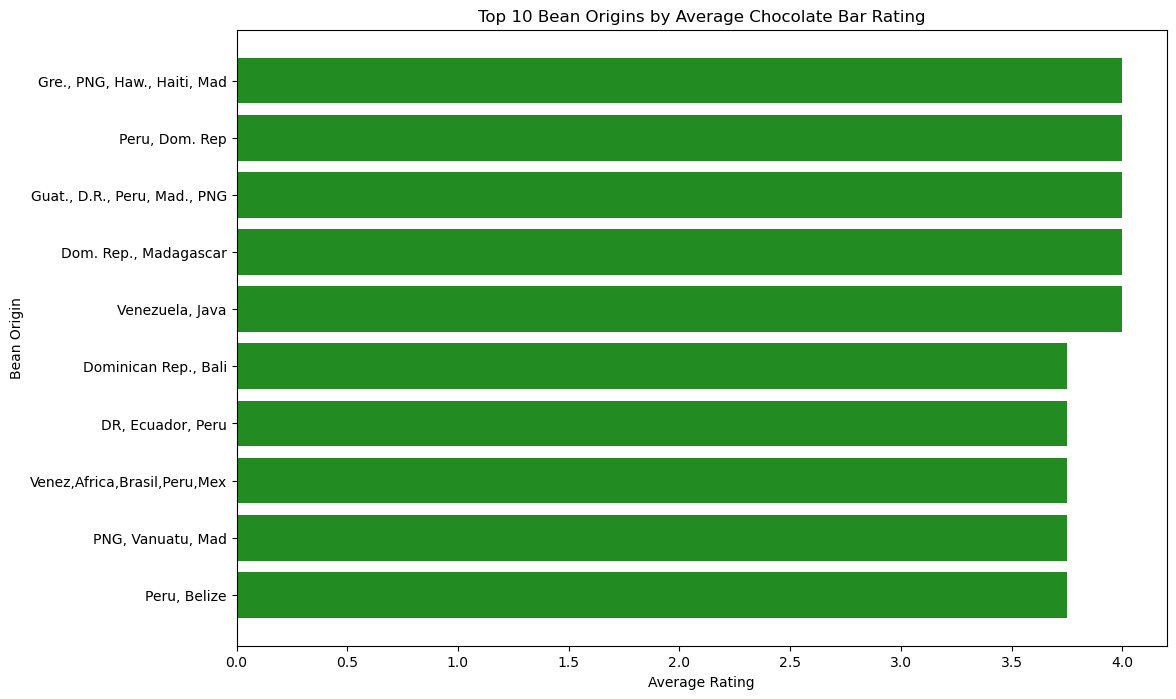

In [32]:
# Calculate average rating by Broad Bean Origin
bean_origin_ratings = data.groupby('Broad Bean Origin')['Rating'].mean().reset_index()
bean_origin_ratings = bean_origin_ratings.sort_values(by='Rating', ascending=False).head(10)

# Plotting top bean origins by average rating
plt.figure(figsize=(12, 8))
plt.barh(bean_origin_ratings['Broad Bean Origin'], bean_origin_ratings['Rating'], color='forestgreen')
plt.xlabel('Average Rating')
plt.ylabel('Bean Origin')
plt.title('Top 10 Bean Origins by Average Chocolate Bar Rating')
plt.gca().invert_yaxis()
plt.show()


We observed that Haiti has the highest quality cocao beans. Furthermore, Venezuela, Madagascar and Brazil also produce high quantity and quality cocao beans.

### Part 5 : Additional Exploratory Analysis

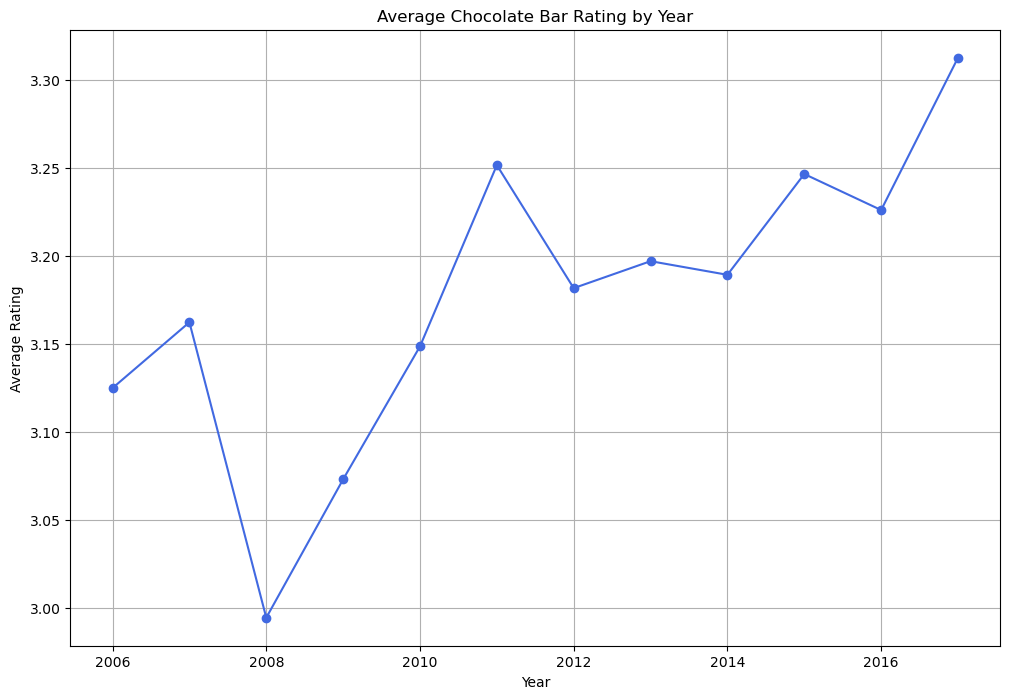

In [33]:
# Part 5.1: Chocolate Bar Rating by Year

# Calculate the average rating per year
yearly_rating = data.groupby('Review Date')['Rating'].mean().reset_index()

# Plotting average chocolate bar rating by year
plt.figure(figsize=(12, 8))
plt.plot(yearly_rating['Review Date'], yearly_rating['Rating'], marker='o', color='royalblue')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.title('Average Chocolate Bar Rating by Year')
plt.grid(True)
plt.show()


In [34]:
# Part 5.2: Best Chocolate Bar with Large Production Volume

# Finding chocolate bars with a minimum count (for larger production representation)
# Assuming bars with more than 5 occurrences represent larger production volume
popular_bars = data['Specific Bean Origin or Bar Name'].value_counts()
popular_bars = popular_bars[popular_bars > 5].index

# Filter data to include only popular bars
large_production_data = data[data['Specific Bean Origin or Bar Name'].isin(popular_bars)]

# Find the highest rated among them
best_large_production = large_production_data.groupby('Specific Bean Origin or Bar Name')['Rating'].mean().reset_index()
best_large_production = best_large_production.sort_values(by='Rating', ascending=False).head(10)

# Displaying the top 10
best_large_production


,Specific Bean Origin or Bar Name,Rating
20,Kokoa Kamili,3.541667
16,Gran Couva,3.458333
32,Piura,3.437500
5,"Camino Verde P., Balao, Guayas",3.428571
28,Oko Caribe,3.416667
33,Porcelana,3.363636
4,Brazil,3.340909
7,Chuao,3.328947
27,Ocumare,3.308824
34,Sambirano,3.302632


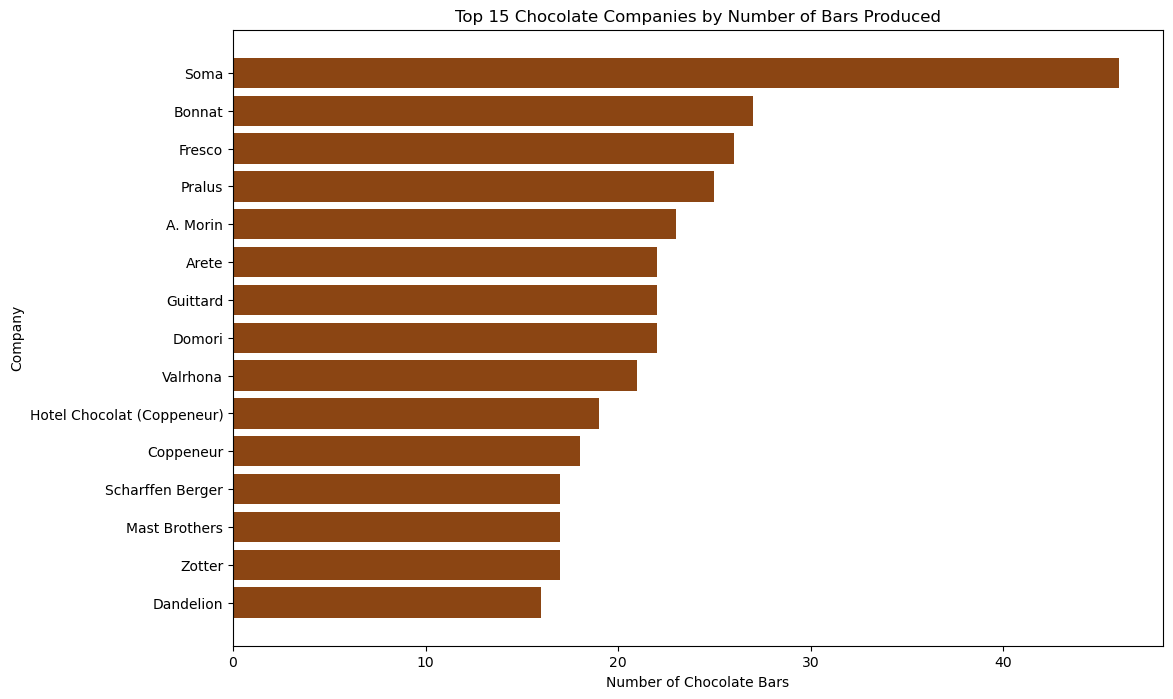

In [35]:
# Redefine the count for the number of chocolate bars each company produces using the exact column name
company_bars = data['Company  (Maker-if known)'].value_counts().head(15)

# Plotting the bar chart for top 15 companies by number of bars produced
plt.figure(figsize=(12, 8))
plt.barh(company_bars.index, company_bars.values, color='saddlebrown')
plt.xlabel('Number of Chocolate Bars')
plt.ylabel('Company')
plt.title('Top 15 Chocolate Companies by Number of Bars Produced')
plt.gca().invert_yaxis()
plt.show()


In [36]:
# Finding the highest-rated chocolate bar
best_chocolate_bar = data.loc[data['Rating'].idxmax(), ['Specific Bean Origin or Bar Name', 'Company  (Maker-if known)', 'Rating']]
best_chocolate_bar


Specific Bean Origin or Bar Name     Chuao
Company  (Maker-if known)           Amedei
Rating                                 5.0
Name: 78, dtype: object

### Part 6: ANOVA - Country-Based Mean Rating Comparison

Assumptions:
- Independence of observations
- Normaldistribution
- Equal variances

H0 : There is No Siginificant Difference of chocolate bar rating between U.S.A, Canada and France.

H1 : There is Siginificant Difference of chocolate bar rating between U.S.A, Canada and France.

In [38]:
# Checking the number of ratings available for each country
country_data['Company Location'].value_counts()


Company Location
France    156
Canada    124
Name: count, dtype: int64

In [41]:
# Filter data for specific locations
filtered_data = data[data['Company Location'].isin(["U.S.A.", "France", "Canada"])]

# Group by location and calculate count, mean, and standard deviation of ratings
summary = filtered_data.groupby('Company Location').agg(
    count=('Rating', 'size'),
    mean=('Rating', 'mean'),
    sd=('Rating', 'std')
).reset_index()

summary

,Company Location,count,mean,sd
0,Canada,124,3.318548,0.420920
1,France,156,3.251603,0.546615
2,U.S.A.,763,3.154980,0.441619


In [43]:

filtered_data = data.dropna(subset=['Company Location'])
grouped_data = filtered_data.groupby('Company Location').filter(lambda x: len(x) >= 10)
grouped_data['mean'] = grouped_data.groupby('Company Location')['Rating'].transform('mean')


<Figure size 1200x800 with 0 Axes>

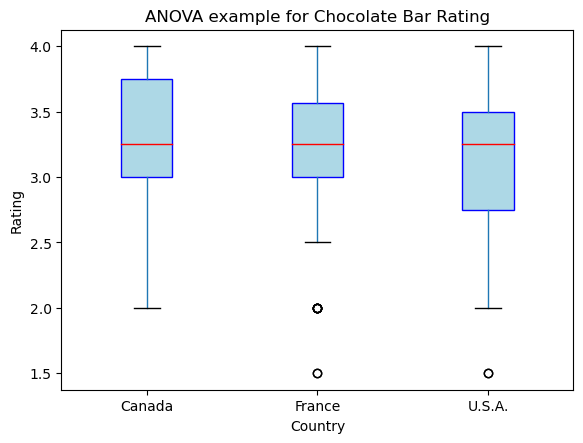

In [48]:
import matplotlib.pyplot as plt

# Filter data for specific locations
filtered_grouped_data = grouped_data[grouped_data['Company Location'].isin(["U.S.A.", "France", "Canada"])]

# Boxplot for ANOVA example
plt.figure(figsize=(12, 8))
filtered_grouped_data.boxplot(column='Rating', by='Company Location', grid=False, patch_artist=True,
                              boxprops=dict(facecolor='lightblue', color='blue'),
                              medianprops=dict(color='red'))
plt.xlabel('Country')
plt.ylabel('Rating')
plt.title('ANOVA example for Chocolate Bar Rating')
plt.suptitle('')  # Suppress the automatic title to match ggplot style
plt.show()


In [44]:
from scipy.stats import f_oneway

# Extract ratings for each country
usa_ratings = grouped_data[grouped_data['Company Location'] == 'U.S.A.']['Rating']
france_ratings = grouped_data[grouped_data['Company Location'] == 'France']['Rating']
canada_ratings = grouped_data[grouped_data['Company Location'] == 'Canada']['Rating']

# Perform ANOVA
anova_result = f_oneway(usa_ratings, france_ratings, canada_ratings)
anova_result

F_onewayResult(statistic=8.579205302576318, pvalue=0.00020160457541588592)

 the 𝑝−𝑣𝑎𝑙𝑢𝑒<0.05, We reject the Null-Hypothesis, which means there is a significant difference between the mean of rating for the chocolate bar in between France, U.S.A. , or Canada.